In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/cleaned_telecom_data.csv")
df.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.og.unq.any.p2,s2.rch.val.p6,s8.new.rev.p6,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,...,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s8.rtd.mou.p3,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s7.s5.s4.day.nomou.p3,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.data.ins.l14,prop.loc.i2i.mou.og.mou.p6
0,-0.76,88.0482,3.106604,3.754955,14.0,39.29,-0.17,-0.72,1.000000,7.16,...,38.660512,7,-0.50,-0.11,0.240533,0.666667,0.0,0,0,0.494346
1,-0.98,67.5039,3.094574,5.550865,2.0,21.67,-0.32,-0.08,0.500000,1.10,...,4.773690,13,-0.11,-0.13,0.459725,0.700000,0.0,0,0,0.767617
2,-0.98,33.9248,2.324016,2.438114,3.0,30.00,-0.05,-0.09,0.384615,4.19,...,0.763355,10,-0.39,-0.12,0.111785,0.333333,0.0,1,0,0.696090
3,-0.92,82.6780,2.630749,2.858961,3.0,50.00,-0.18,1.83,0.416667,0.40,...,0.787963,11,-0.02,-0.14,1.920826,0.333333,0.0,2,0,0.437088
4,-0.97,96.8379,2.674316,2.912397,2.0,22.50,0.01,-0.04,0.222222,5.12,...,0.941257,0,-0.63,-0.02,1.728186,0.750000,0.0,1,2,0.585977


In [6]:
#churn - switch to other provider - target = 1
#not churn - remain active customer - target = 0

In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [19]:
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [20]:
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
train_pred = best_clf.predict(X_train)
test_pred = best_clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy after Pruning:", train_acc)
print("Test Accuracy after Pruning:", test_acc)

Train Accuracy after Pruning: 0.796
Test Accuracy after Pruning: 0.7978


In [22]:
conf_matrix = confusion_matrix(y_test, test_pred)
class_report = classification_report(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[3005  432]
 [ 579  984]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3437
           1       0.69      0.63      0.66      1563

    accuracy                           0.80      5000
   macro avg       0.77      0.75      0.76      5000
weighted avg       0.79      0.80      0.79      5000



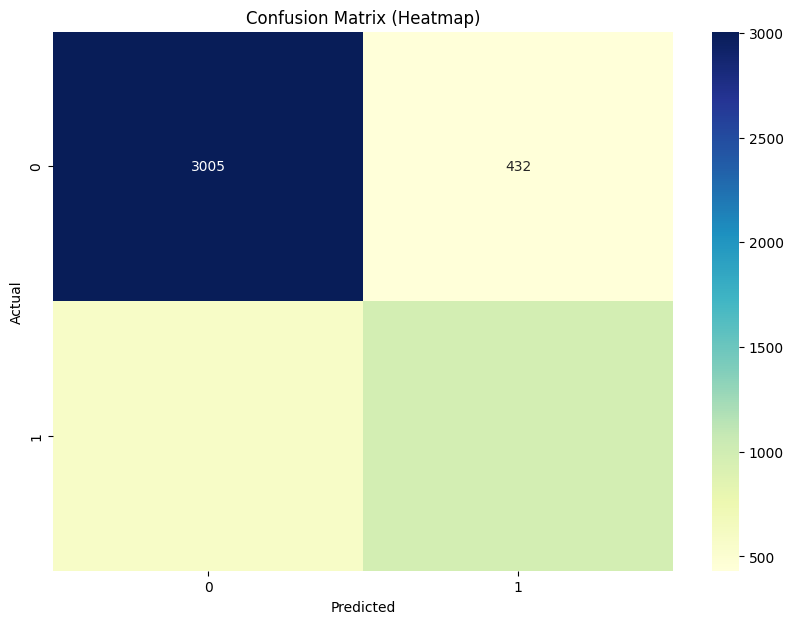

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Heatmap)')
plt.show()